# Anisotropic Diffusion
    Juan S. Rodriguez
    Volume 4

In [1]:
from matplotlib import cm, pyplot as plt
from scipy.misc import imread, imsave
from numpy.random import randint
import scipy.linalg as la
import numpy as np
% matplotlib inline

### Exploration

(800, 600)
(802, 602)


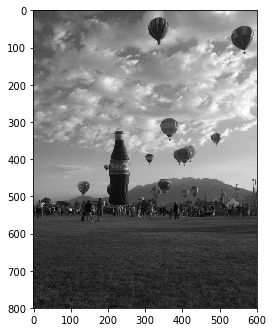

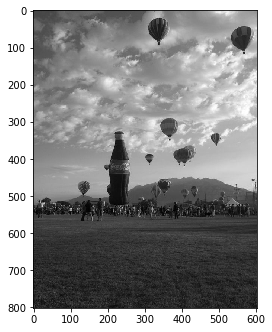

In [28]:
# To read in an image, convert it to grayscale, and rescale it.
picture = imread('balloon.jpg', flatten=True) * 1./255
print(picture.shape)
# To display the picture as grayscale
U = picture

print(U.shape)

plt.figure(figsize=(4,10))
plt.imshow(picture, cmap=cm.gray)
plt.show()

## Anisotropic Difference Scheme

In [2]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    # Pad it
    
    U = np.insert(U, 0, U[0,:], axis=0)
    U = np.insert(U, -1, U[-1,:], axis=0)
    U = np.insert(U, 0, U[:,0], axis=1)
    U = np.insert(U, -1, U[:,-1], axis=1)
    lam, G = lambda_,g
    # Top Edge
    for i in range(N):
        U[1:-1,1:-1] += lam*( G(abs(U[1:-1,:-2] - U[1:-1,1:-1])) * (U[1:-1,:-2]-U[1:-1,1:-1])
                        +G(abs(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:]-U[1:-1,1:-1])
                        +G(abs(U[:-2,1:-1] - U[1:-1,1:-1])) * (U[:-2,1:-1]-U[1:-1,1:-1])
                        +G(abs(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1]-U[1:-1,1:-1]))
        U[1:-1,0] = U[1:-1,1]
        U[0,1:-1] = U[1,1:-1]
        U[1:-1,-1] = U[1:-1,-2]
        U[-1,1:-1] = U[-2,1:-1]
    return(U)

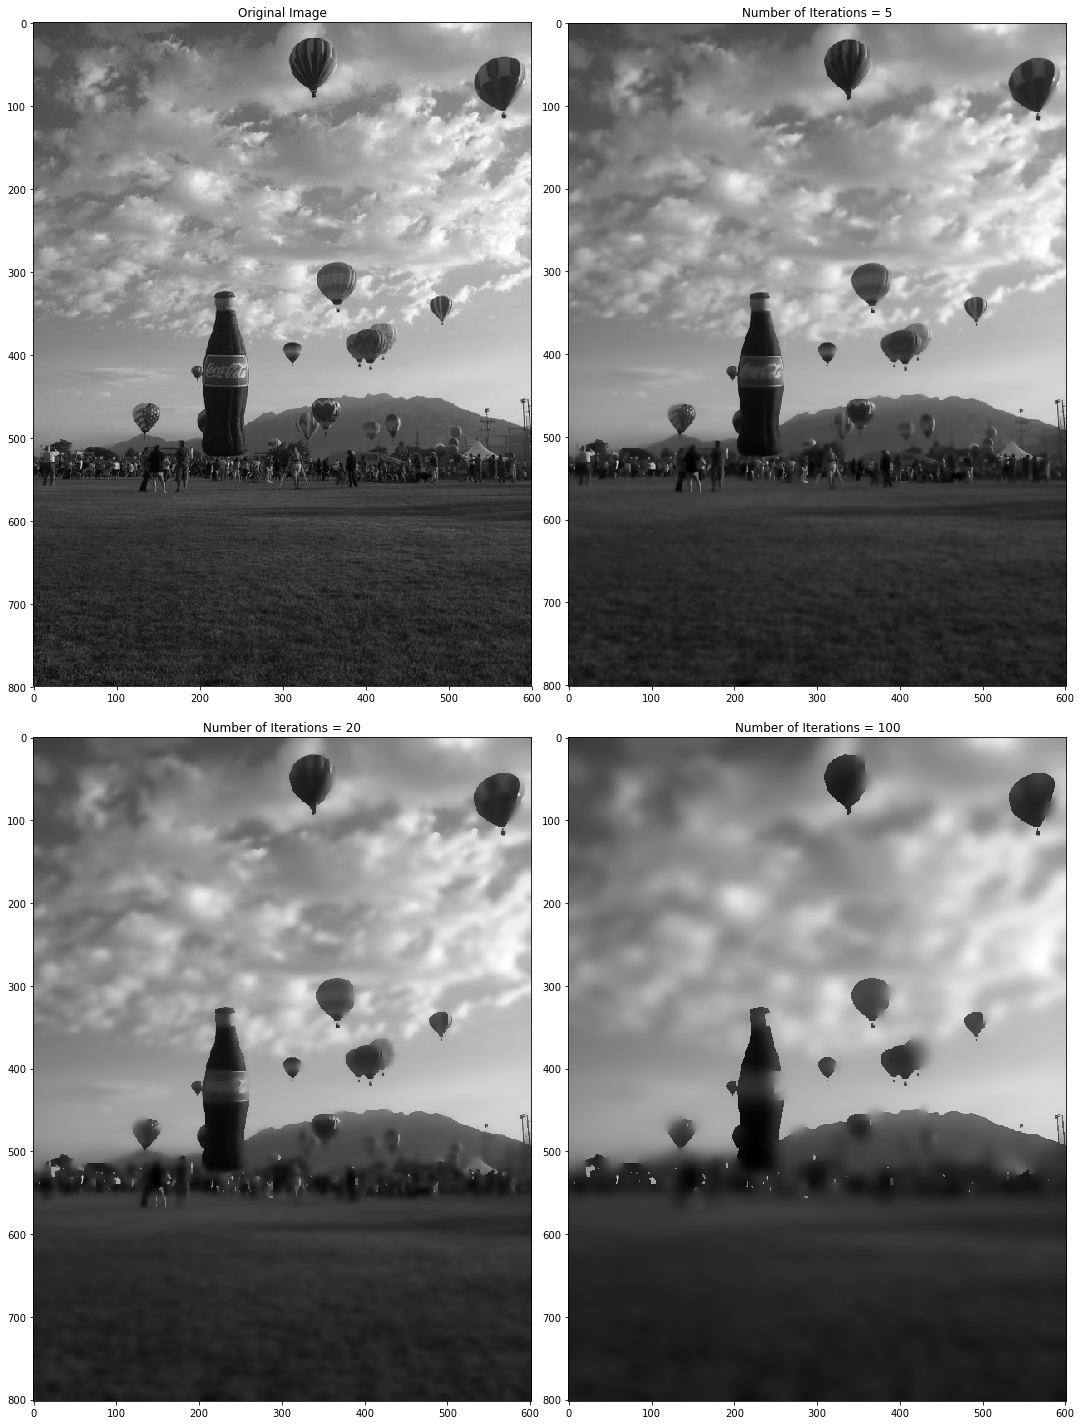

In [13]:
G = lambda x: np.exp(-(x/.1)**2)
U = imread('balloon.jpg', flatten=True) * 1./255
N = [5,20,100]
lambda_ = .25
plt.figure(figsize=(15,20))
plt.subplot(2,2,1).set_title('Original Image')
plt.imshow(U, cmap=cm.gray)
for i in range(len(N)):
    answer = anisdiff_bw(U, N[i], lambda_, G)
    plt.subplot(2,2,i+2).set_title('Number of Iterations = '+str(N[i]))
    plt.imshow(answer, cmap=cm.gray)
plt.tight_layout()
plt.show()

## Color Scales

In [147]:
def anisdiff_rgb(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    # Pad it
    norma = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    
    U = np.insert(U, 0, U[0,:], axis=0)
    U = np.insert(U, -1, U[-1,:], axis=0)
    U = np.insert(U, 0, U[:,0], axis=1)
    U = np.insert(U, -1, U[:,-1], axis=1)
    lam, G = lambda_,g
    # Top Edge
    for i in range(N):
        U[1:-1,1:-1] += lam*( G(norma(U[1:-1,:-2] - U[1:-1,1:-1])) * (U[1:-1,:-2]-U[1:-1,1:-1])
                        +G(norma(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:]-U[1:-1,1:-1])
                        +G(norma(U[:-2,1:-1] - U[1:-1,1:-1])) * (U[:-2,1:-1]-U[1:-1,1:-1])
                        +G(norma(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1]-U[1:-1,1:-1]))
        U[1:-1,0] = U[1:-1,1]
        U[0,1:-1] = U[1,1:-1]
        U[1:-1,-1] = U[1:-1,-2]
        U[-1,1:-1] = U[-2,1:-1]
    return(U)

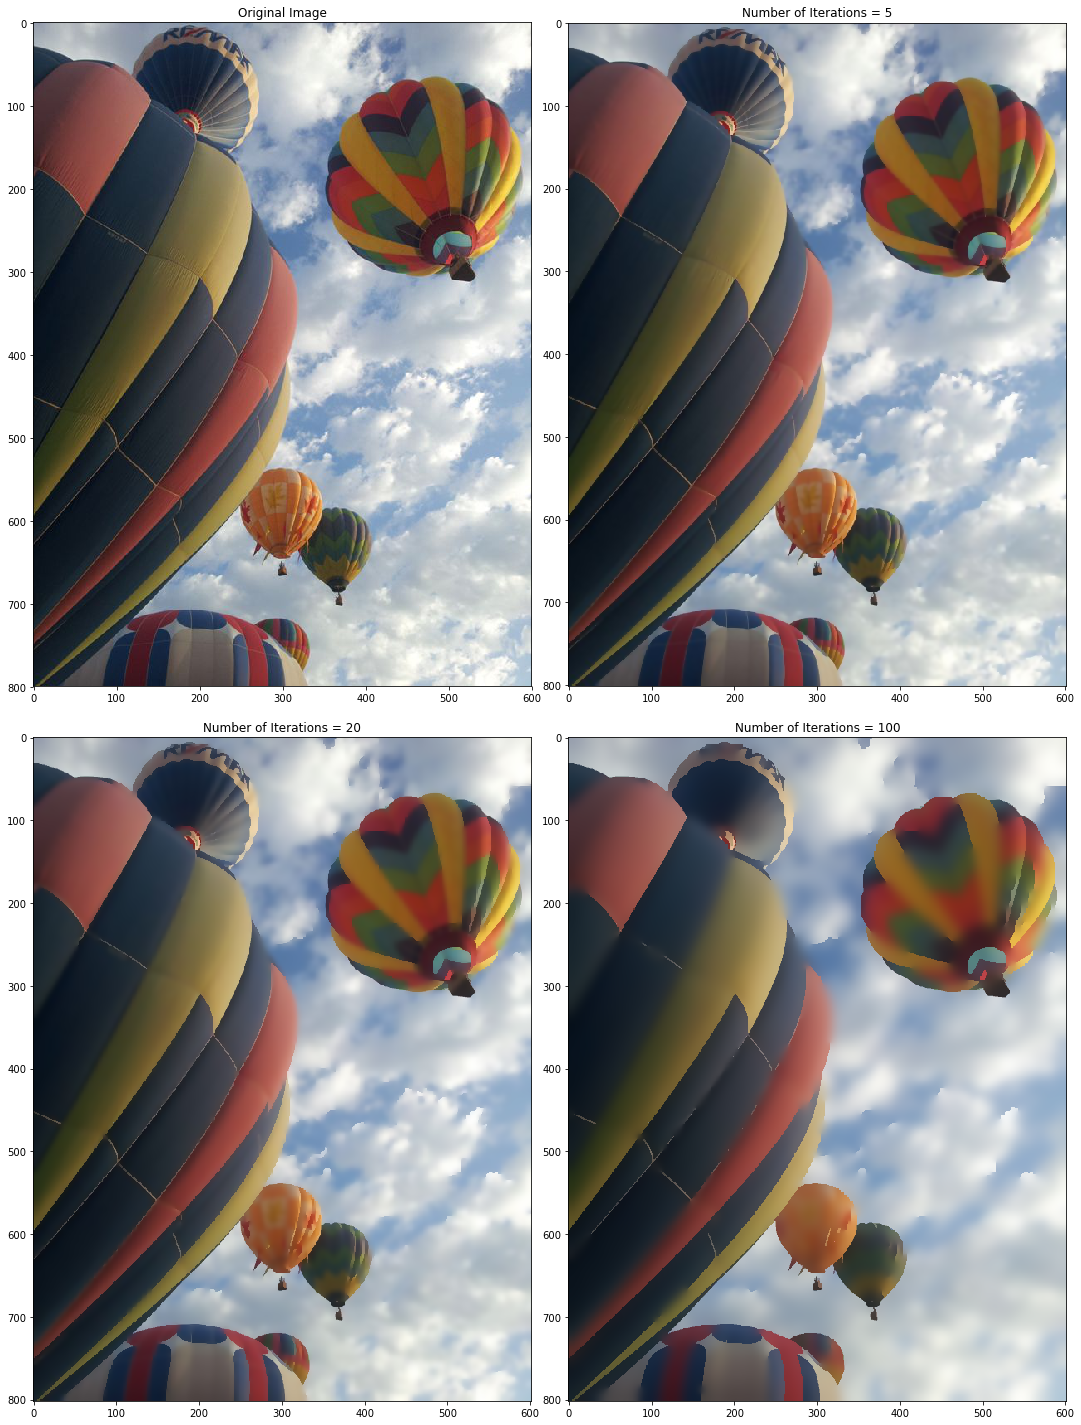

In [148]:
G = lambda x: np.exp(-(x/.1)**2)
U = imread('balloons_color.jpg') * 1./255
N = [5,20,100]
lambda_ = .25
plt.figure(figsize=(15,20))
plt.subplot(2,2,1).set_title('Original Image')
plt.imshow(U)
for i in range(len(N)):
    answer = anisdiff_rgb(U, N[i], lambda_, G)
    plt.subplot(2,2,i+2).set_title('Number of Iterations = '+str(N[i]))
    plt.imshow(answer)
plt.tight_layout()
plt.show()

## Noisy Images

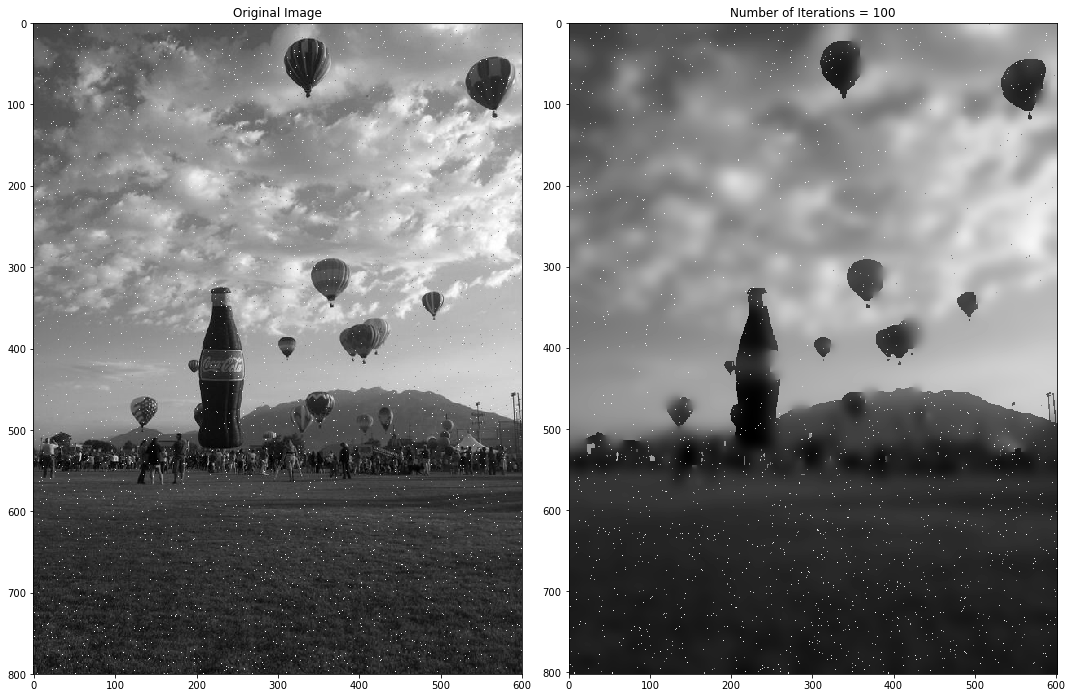

In [17]:
image = imread('balloon.jpg', flatten=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
image = image * 1/255
    
G = lambda x: np.exp(-(x/.1)**2)
N = [100]
lambda_ = .25
plt.figure(figsize=(15,18))
plt.subplot(1,2,1).set_title('Original Image')
plt.imshow(image, cmap=cm.gray)
for i in range(len(N)):
    answer = anisdiff_bw(image, N[i], lambda_, G)
    plt.subplot(1,2,i+2).set_title('Number of Iterations = '+str(N[i]))
    plt.imshow(answer, cmap=cm.gray)
plt.tight_layout()
plt.show()

We can see that after applying an anisotropic scheme to blur the image, we are not able to remove the specific noise. The reasoning for this comes from the fact that the Laplace operator attempts to not erase boundaries (sudden changes in color). Given the strong noise changes, the algorithm identifies the noise as a boundary, and does not blur it out.

In [ ]:
#        U[1:-1,1:-1,1] += lam*( G(la.norm(U[1:-1,:-2,1] - U[1:-1,1:-1,1],ord=2)) * (U[1:-1,:-2,0]-U[1:-1,1:-1,1])
#                        +G(la.norm(U[1:-1,2:,1] - U[1:-1,1:-1,1],ord=2)) * (U[1:-1,2:,0]-U[1:-1,1:-1,1])
#                        +G(la.norm(U[:-2,1:-1,1] - U[1:-1,1:-1,1],ord=2)) * (U[:-2,1:-1,0]-U[1:-1,1:-1,1])
#                        +G(la.norm(U[2:,1:-1,1] - U[1:-1,1:-1,1],ord=2)) * (U[2:,1:-1,0]-U[1:-1,1:-1,1]))
#        U[1:-1,1:-1,2] += lam*( G(la.norm(U[1:-1,:-2,2] - U[1:-1,1:-1,2],ord=2)) * (U[1:-1,:-2,2]-U[1:-1,1:-1,2])
#                        +G(la.norm(U[1:-1,2:,2] - U[1:-1,1:-1,2],ord=2)) * (U[1:-1,2:,2]-U[1:-1,1:-1,2])
#                        +G(la.norm(U[:-2,1:-1,2] - U[1:-1,1:-1,2],ord=2)) * (U[:-2,1:-1,2]-U[1:-1,1:-1,2])
#                        +G(la.norm(U[2:,1:-1,2] - U[1:-1,1:-1,2],ord=2)) * (U[2:,1:-1,2]-U[1:-1,1:-1,2]))